In [23]:
import os
import operator
import functools

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [3]:
import lib

In [4]:
shear_step_plus = "g1_slice=0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0"
shear_step_minus = "g1_slice=-0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0"

In [24]:
def get_weight(weight_dataset, weight_keys=["statistical_weight"]):
    return functools.reduce(
        operator.mul,
        [
            weight_dataset[weight_key][:]
            for weight_key in weight_keys
        ],
    )

---

In [30]:
tomo_plus = h5py.File(lib.const.SIM_TOMOGRAPHY_CATALOGS[shear_step_plus])

In [5]:
weight_plus = h5py.File(lib.const.SIM_WEIGHT_CATALOGS[shear_step_plus])

In [6]:
neighbors_plus = h5py.File(
    f"/pscratch/sd/s/smau/fiducial-neighbors/neighbors_{shear_step_plus}.hdf5",
)

In [41]:
bhat_plus = tomo_plus["sompz"]["noshear"]["bhat"][:]

In [7]:
d_plus = neighbors_plus["mdet"]["noshear"]["neighbor_distance"][:]

In [8]:
print(np.nanmin(d_plus), np.nanmax(d_plus))

1.5229548185634546e-09 0.04043589154999748


In [27]:
w_plus = get_weight(weight_plus["mdet"]["noshear"], ["statistical_weight"])

In [28]:
rw_plus = get_weight(weight_plus["mdet"]["noshear"], ["statistical_weight", "neighbor_weight"])

In [19]:
NBINS = 100 
bins = np.deg2rad(np.geomspace(1e-2, 1e1, NBINS + 1) / 60)

In [20]:
print(np.min(bins), np.max(bins))

2.9088820866572157e-06 0.002908882086657216


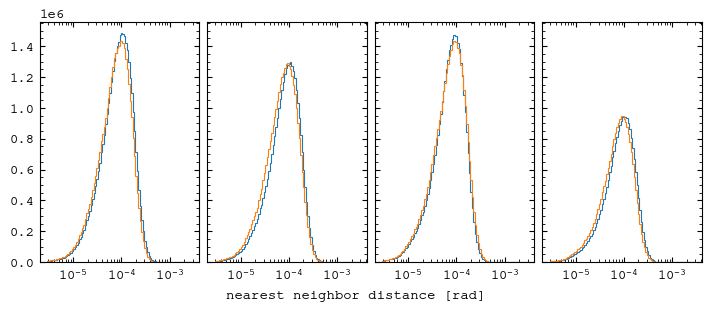

In [42]:
fig, axs = plt.subplots(1, len(lib.const.TOMOGRAPHIC_BINS), sharex=True, sharey=True, figsize=(7, 3), constrained_layout=True)

for i in lib.const.TOMOGRAPHIC_BINS:
    sel = (bhat_plus == i)
    axs[i].hist(
        d_plus[sel],
        weights=w_plus[sel],
        label="unweighted",
        bins=bins,
        histtype="step",
    )
    axs[i].hist(
        d_plus[sel],
        weights=rw_plus[sel],
        label="weighted",
        bins=bins,
        histtype="step",
    )


axs[0].set_xscale("log")
# plt.xlim(0, None)
# axs[0].legend(loc="upper left")

fig.supxlabel("nearest neighbor distance [rad]")
# fig.supylabel("")

plt.show()

---